# MS_1

In [1]:
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas import DataFrame
from IPython.display import display
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from sklearn.svm import SVR
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from pylab import *
matplotlib.style.use('ggplot')

In [2]:
admissions=pd.read_csv('MAIN_DF_9.csv')
admissions=admissions.drop(['Unnamed: 0'], axis=1)
admissions=admissions.reset_index(drop=True)
print(admissions.shape)
print('unique SUBJECT_ID:', admissions.SUBJECT_ID.nunique())
print('unique HADM_ID   :', admissions.HADM_ID.nunique())
print('unique ICUSTAY_ID:', admissions.ICUSTAY_ID.nunique())
admissions.head()

(23055, 75)
unique SUBJECT_ID: 17469
unique HADM_ID   : 21650
unique ICUSTAY_ID: 23055


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,TYPE_AD,ETHNICITY,LOS,BMI,I_VEN,NI_VEN,ALBUMIN,BUN,CREATININE,GLUCOSE,HTOCRIT,LACTIC,PCO2A,PHA,PHD,PLATELETC,PO2A,SAO2,SODIUM,TBILIRUBIN,WBC,FIO2,RR,SPO2,ABPD,ABPM,ABPS,HR,NBPD,NBPM,NBPS,TEMP,PrevDays,INSMcaid,INSMcare,INSPvate,FCU_CCU,FCU_CSRU,FCU_MICU,FCU_SICU,FCU_TSICU,GCS_E_None,GCS_ESpon,GCS_EPain,GCS_ESpch,GCS_MAbFl,GCS_MAbex,GCS_MFlwd,GCS_MLoPa,GCS_MNore,GCS_MObCo,GCS_VConf,GCS_VInWo,GCS_VInso,GCS_VNORe,GCS_VNRET,GCS_VOrie,S_TEMP_Cold,S_TEMP_Cool,S_TEMP_Hot,S_TEMP_Warm,FW12,FW14,FW15,FW23,FW33,FW50,FW52,FW57,FW7
0,23,124321,234044,1,75.26000,1,1,1.1862,21.7,0,0,NaN,14.0,0.6,136.0,36.9,NaN,NaN,NaN,NaN,208.0,NaN,NaN,144.0,NaN,14.8,NaN,14.0,100.0,74.0,86.0,181.0,77.0,45.0,50.0,67.0,35.4,2.67,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,34,144319,290505,1,90.89934,1,1,1.5824,27.4,0,0,NaN,36.0,1.6,116.0,35.9,NaN,NaN,NaN,NaN,343.0,NaN,NaN,139.0,NaN,7.1,60.0,14.0,98.0,NaN,NaN,NaN,72.0,66.0,78.0,112.0,36.1,0.00,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,36,165660,241249,1,72.73000,0,1,4.3483,32.7,1,0,2.8,19.0,0.9,126.0,36.3,1.0,60.0,7.29,NaN,174.0,58.0,94.0,139.0,0.6,15.3,100.0,20.0,91.0,NaN,NaN,NaN,94.0,72.0,84.0,122.0,37.4,1.81,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,85,112077,291697,1,76.85000,1,1,1.9909,31.8,0,0,NaN,17.0,1.4,114.0,26.4,NaN,NaN,NaN,NaN,24.0,NaN,NaN,137.0,NaN,8.3,NaN,39.0,99.0,NaN,NaN,NaN,136.0,87.0,99.0,166.0,37.0,0.00,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,107,182383,252542,1,69.66000,1,0,1.0806,31.3,0,0,NaN,36.0,5.8,125.0,40.3,NaN,NaN,NaN,NaN,303.0,NaN,NaN,139.0,NaN,14.2,NaN,19.0,97.0,NaN,NaN,NaN,64.0,67.0,88.0,155.0,36.7,0.00,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [3]:
admissions['LOS_C']=np.where((admissions['LOS']>0)&(admissions['LOS']<1), '0-1',
                              np.where((admissions['LOS']>=1)&(admissions['LOS']<2), '1-2',
                                  np.where((admissions['LOS']>=2)&(admissions['LOS']<4), '2-4',
                                          np.where((admissions['LOS']>=4)&(admissions['LOS']<6), '4-6','>6'))))
admissions['LOS_C'].value_counts()

1-2    7883
2-4    6156
0-1    3873
>6     2957
4-6    2186
Name: LOS_C, dtype: int64

In [4]:
admissions['LOS_C']=np.where(admissions['LOS_C']=='0-1', 1,
                              np.where(admissions['LOS_C']=='1-2', 1,
                                  np.where(admissions['LOS_C']=='2-4', 0,
                                          np.where(admissions['LOS_C']=='4-6', 0,0))))
admissions['LOS_C'].value_counts()

1    11756
0    11299
Name: LOS_C, dtype: int64

In [5]:
admissions['LOS_C'].value_counts()[1]/admissions['LOS_C'].value_counts().sum()

0.50991108219475167

In [6]:
admissions=admissions.drop(['LOS'], axis=1)
admissions.shape

(23055, 75)

In [7]:
admissions.isnull().sum().sort_values(ascending=False)[:14]

SAO2          17081
ALBUMIN       14559
PHD           14115
ABPM          13737
ABPS          13731
ABPD          13712
TBILIRUBIN    12842
PCO2A         11549
PO2A          11491
PHA           11479
FIO2          10948
LACTIC        10837
SPO2              0
HR                0
dtype: int64

In [8]:
admissions['PO2A'].groupby(admissions['GENDER']).mean()

GENDER
0    190.981058
1    207.025496
Name: PO2A, dtype: float64

Better fill missing values by gender

In [9]:
admissions['SAO2'] = admissions['SAO2'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ALBUMIN'] = admissions['ALBUMIN'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PHD'] = admissions['PHD'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPM'] = admissions['ABPM'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPS'] = admissions['ABPS'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPD'] = admissions['ABPD'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['TBILIRUBIN'] = admissions['TBILIRUBIN'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PCO2A'] = admissions['PCO2A'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PO2A'] = admissions['PO2A'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PHA'] = admissions['PHA'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['FIO2'] = admissions['FIO2'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['LACTIC'] = admissions['LACTIC'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [10]:
#admissions=admissions.drop(['SAO2', 'ABPD', 'ABPS'], axis=1)
#admissions.shape

In [11]:
admissions=admissions.drop(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID'], axis=1)
admissions.shape

(23055, 72)

In [12]:
admissions.isnull().sum().sum()

0

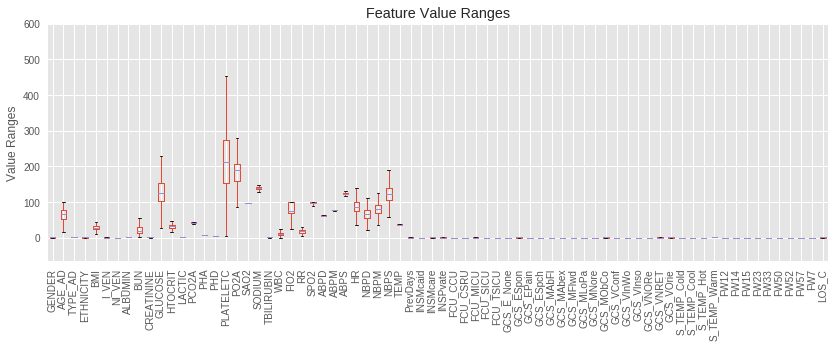

In [13]:
#admissions.iloc[:,0:30].boxplot()
plt.figure(figsize=(14,5))
admissions.boxplot()
plt.xticks(rotation=90)
#plt.xlabel("Attribute Index")
plt.ylabel(("Value Ranges"))
plt.ylim(ymax=600)
plt.title('Feature Value Ranges')
plt.subplots_adjust(bottom=0.22)
#plt.savefig('fvalra2.eps', format='eps', dpi=1200)
plt.show()

In [14]:
admissions.columns

Index(['GENDER', 'AGE_AD', 'TYPE_AD', 'ETHNICITY', 'BMI', 'I_VEN', 'NI_VEN',
       'ALBUMIN', 'BUN', 'CREATININE', 'GLUCOSE', 'HTOCRIT', 'LACTIC', 'PCO2A',
       'PHA', 'PHD', 'PLATELETC', 'PO2A', 'SAO2', 'SODIUM', 'TBILIRUBIN',
       'WBC', 'FIO2', 'RR', 'SPO2', 'ABPD', 'ABPM', 'ABPS', 'HR', 'NBPD',
       'NBPM', 'NBPS', 'TEMP', 'PrevDays', 'INSMcaid', 'INSMcare', 'INSPvate',
       'FCU_CCU', 'FCU_CSRU', 'FCU_MICU', 'FCU_SICU', 'FCU_TSICU',
       'GCS_E_None', 'GCS_ESpon', 'GCS_EPain', 'GCS_ESpch', 'GCS_MAbFl',
       'GCS_MAbex', 'GCS_MFlwd', 'GCS_MLoPa', 'GCS_MNore', 'GCS_MObCo',
       'GCS_VConf', 'GCS_VInWo', 'GCS_VInso', 'GCS_VNORe', 'GCS_VNRET',
       'GCS_VOrie', 'S_TEMP_Cold', 'S_TEMP_Cool', 'S_TEMP_Hot', 'S_TEMP_Warm',
       'FW12', 'FW14', 'FW15', 'FW23', 'FW33', 'FW50', 'FW52', 'FW57', 'FW7',
       'LOS_C'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ad = sc.fit_transform(admissions)

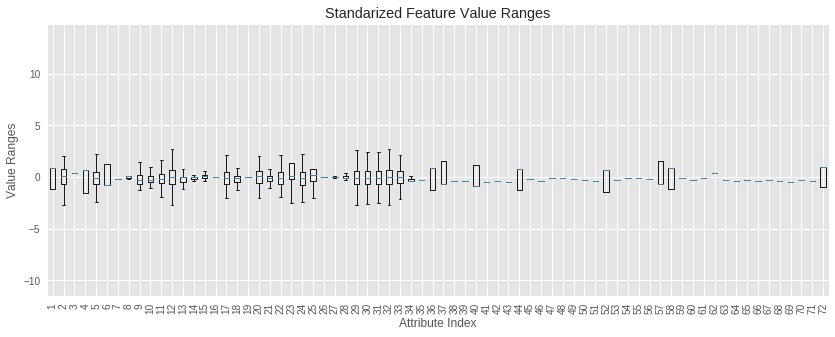

In [16]:
#array = admissions.iloc[:,1:9].values
#boxplot(ad[:,0:30])
plt.figure(figsize=(14,5))
boxplot(ad)
plt.xticks(rotation=90)
plt.xlabel("Attribute Index")
plt.ylabel(("Value Ranges"))
plt.title('Standarized Feature Value Ranges')
#plt.savefig('stafvalra.eps', format='eps', dpi=1200)
show()

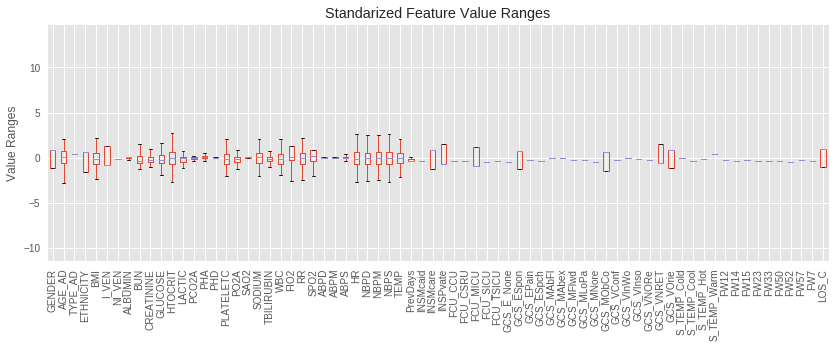

In [17]:
scaled_features = StandardScaler().fit_transform(admissions.values)
scaled_features_df = pd.DataFrame(scaled_features, index=admissions.index, columns=admissions.columns)
#admissions.iloc[:,0:30].boxplot()
plt.figure(figsize=(14,5))
scaled_features_df.boxplot()
plt.xticks(rotation=90)
#plt.xlabel("Attribute Index")
plt.ylabel(("Value Ranges"))
#plt.ylim(ymax=7500)
plt.title('Standarized Feature Value Ranges')
plt.subplots_adjust(bottom=0.22)
#plt.savefig('stafvalra.eps', format='eps', dpi=1200)
plt.show()

In [18]:
data_final_vars=admissions.columns.values.tolist()
y=['LOS_C']
x=[i for i in data_final_vars if i not in y]
data_final=admissions
data_final.shape
X=data_final[x]
y=data_final[y]

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.transform(y)

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
#print(result.summary())

         Current function value: 0.600137
         Iterations: 35


/home/jordi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/jordi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Logistic Regression

In [22]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [23]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
model.score(X_test, y_test)

0.67803961254879286

In [24]:
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline,X,y,cv=kf,
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results.mean()

0.68102369937520346

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
actr=np.round(100*logreg.score(X_train, y_train),4)
acte=np.round(100*logreg.score(X_test, y_test),4)
print('Accuracy of logistic regression classifier on train set:', actr)
print('Accuracy of logistic regression classifier on test set:', acte)

Accuracy of logistic regression classifier on train set: 68.2922
Accuracy of logistic regression classifier on test set: 67.804


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2052 1367]
 [ 860 2638]]


In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)
score = np.round(logreg.score(X_test, y_test)*100,4)

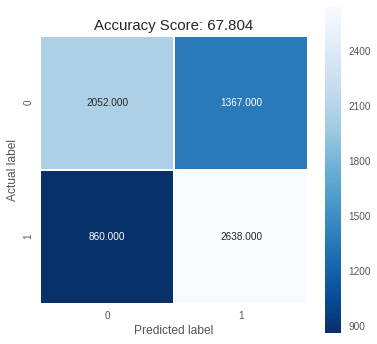

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [29]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

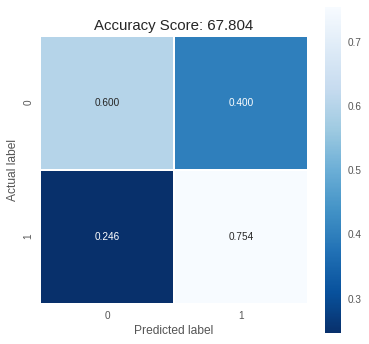

In [30]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.60      0.65      3419
          1       0.66      0.75      0.70      3498

avg / total       0.68      0.68      0.68      6917



In [32]:
logreg.predict(X_test)

array([0, 1, 1, ..., 1, 0, 1])

In [33]:
logreg.predict_proba(X_test)

array([[ 0.51477068,  0.48522932],
       [ 0.34309031,  0.65690969],
       [ 0.31202923,  0.68797077],
       ..., 
       [ 0.23240617,  0.76759383],
       [ 0.81360244,  0.18639756],
       [ 0.2040762 ,  0.7959238 ]])

In [34]:
logreg.predict_proba(X_test)[::,1]

array([ 0.48522932,  0.65690969,  0.68797077, ...,  0.76759383,
        0.18639756,  0.7959238 ])

# Random Forest

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10, random_state = 42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
ttac=np.round(metrics.accuracy_score(y_test, y_pred)*100,4)
trac=np.round(clf.score(X_train, y_train)*100,4)
print("Accuracy test:",ttac)
print("Accuracy train:",trac)

Accuracy test: 68.469
Accuracy train: 98.897


In [36]:
clf1=RandomForestClassifier(n_estimators=100, random_state = 42)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Accuracy test:",np.round(metrics.accuracy_score(y_test, y_pred)*100,4))
print("Accuracy train:",np.round(clf.score(X_train, y_train)*100,4))

Accuracy test: 72.0688
Accuracy train: 98.897


Put more trees is not the solution! OVERFITTING

In [37]:
RFC = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(RFC, X, y, cv = 10, scoring='accuracy')
scores.mean()

0.73038438745676282

In [38]:
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.71765216134162213

In [39]:
RFC.score(X_train, y_train)

1.0

In [40]:
feature_imp = pd.Series(RFC.feature_importances_,index=x).sort_values(ascending=False)[:50]

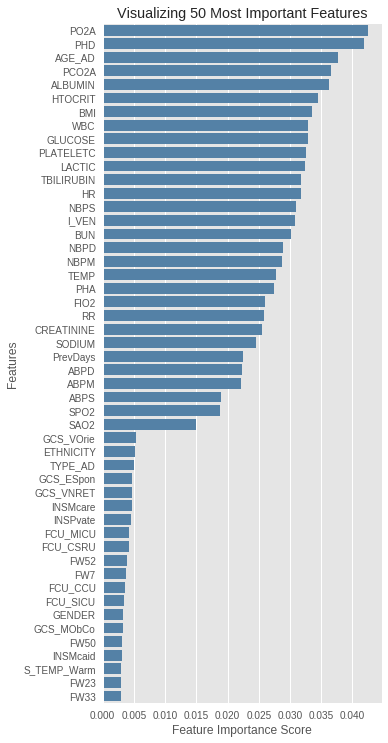

In [41]:
%matplotlib inline
plt.figure(figsize=(5,12.5))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='steelblue')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing 50 Most Important Features')
plt.legend()
plt.show()

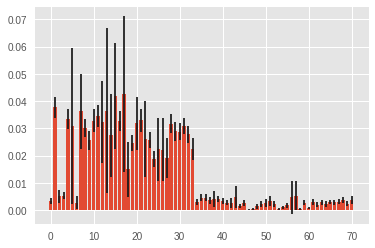

In [42]:
importance = RFC.feature_importances_
importance = pd.DataFrame(importance, index=x, columns=["Importance"])
importance["Std"] = np.std([tree.feature_importances_
                            for tree in RFC.estimators_], axis=0)
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]
plt.bar(x, y, yerr=yerr, align="center")
plt.show()

In [43]:
importance=importance.sort_values(by='Importance', ascending=False)

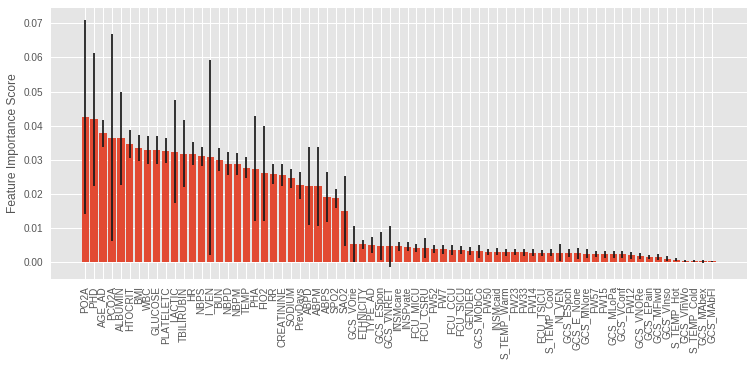

In [48]:
plt.figure(figsize=(12.5,6))
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]
plt.bar(x, y, yerr=yerr, align="center")
LABELS = importance.index
plt.xticks(x, LABELS, rotation='vertical')
plt.ylabel('Feature Importance Score')
#plt.margins(0.2)
plt.subplots_adjust(bottom=0.25)
plt.savefig('11features.eps', format='eps', dpi=1200)
plt.show()

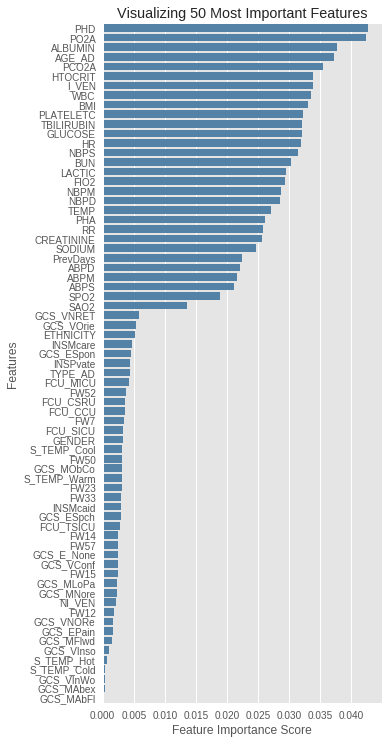

In [45]:
%matplotlib inline
plt.figure(figsize=(5,12.5))
sns.barplot(x=importance.Importance, y=importance.index,ci='sd', color='steelblue')
#sns.barplot(x=importance.Importance, y=importance.index, data=importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing 50 Most Important Features')
plt.legend()
plt.show()

# Random Forest Classifier

In [129]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(RFC, X, y, cv=10, method='predict_proba')
predicted1 = cross_val_predict(RFC, X, y, cv=10)
acrff=np.round(metrics.accuracy_score(y, predicted1)*100,4) 

# Log Reg

In [68]:
logreg = LogisticRegression()
pp = cross_val_predict(logreg, X, y, cv=10, method='predict_proba')
pp1= cross_val_predict(logreg, X, y, cv=10)
mmmm=np.round(metrics.accuracy_score(y, pp1)*100,4)

# Neural Networks

In [70]:
X_test.shape

(6917, 71)

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=71, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=25,
          batch_size=128)
score1 = model.evaluate(X_test, y_test, batch_size=128)
score2 = model.evaluate(X_train, y_train, batch_size=128)
score1 = np.round(score1[1]*100,4)
score2 = np.round(score2[1]*100,4)

Using TensorFlow backend.


Epoch 1/25
16138/16138 [==============================] - 0s 29us/step - loss: 0.7130 - acc: 0.5648
Epoch 2/25
16138/16138 [==============================] - 0s 17us/step - loss: 0.6594 - acc: 0.6173
Epoch 3/25
16138/16138 [==============================] - 0s 18us/step - loss: 0.6341 - acc: 0.6477
Epoch 4/25
16138/16138 [==============================] - 0s 17us/step - loss: 0.6220 - acc: 0.6633
Epoch 5/25
16138/16138 [==============================] - 0s 16us/step - loss: 0.6117 - acc: 0.6719
Epoch 6/25
16138/16138 [==============================] - 0s 14us/step - loss: 0.6027 - acc: 0.6811
Epoch 7/25
16138/16138 [==============================] - 0s 14us/step - loss: 0.6000 - acc: 0.6848
Epoch 8/25
16138/16138 [==============================] - 0s 15us/step - loss: 0.5951 - acc: 0.6870
Epoch 9/25
16138/16138 [==============================] - 0s 14us/step - loss: 0.5911 - acc: 0.6906
Epoch 10/25
16138/16138 [==============================] - 0s 14us/step - loss: 0.5906 - acc: 0.6910

In [72]:
print('test :', score1)
print('train:', score2)

test : 69.8424
train: 73.0512


In [73]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
np.random.seed(0)

In [74]:
def create_network():
    
    model = Sequential()
    model.add(Dense(64, input_dim=71, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    
    return model

In [75]:
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=25, 
                                 batch_size=100, 
                                 verbose=0)

In [76]:
np.mean(cross_val_score(neural_network, X, y, cv=10))

0.71095232370749595

In [77]:
nn = cross_val_predict(neural_network, X, y, cv=10, method='predict_proba')
nn1 = cross_val_predict(neural_network, X, y, cv=10)
nnnn=np.round(metrics.accuracy_score(y, nn1)*100,4)

# KNeighbors Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
hh=[]
for i in range (1,51):
    kn=KNeighborsClassifier(n_neighbors=i)
    kkk = cross_val_predict(kn, X, y, cv=10, method='predict_proba')
    kkk1= cross_val_predict(kn, X, y, cv=10)
    kkkk=np.round(metrics.accuracy_score(y, kkk1)*100,4)
    hh.append(kkkk)

In [108]:
yy=list(range(1,51))

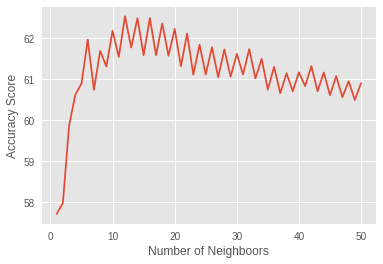

In [116]:
plt.plot(yy,hh)
plt.xlabel('Number of Neighboors')
plt.ylabel('Accuracy Score')
#plt.title()
plt.savefig('11neigh.eps', format='eps', dpi=1200)
plt.show()

In [79]:
kn=KNeighborsClassifier(n_neighbors=12)
kkk = cross_val_predict(kn, X, y, cv=10, method='predict_proba')
kkk1= cross_val_predict(kn, X, y, cv=10)
kkkk=np.round(metrics.accuracy_score(y, kkk1)*100,4)

# Results

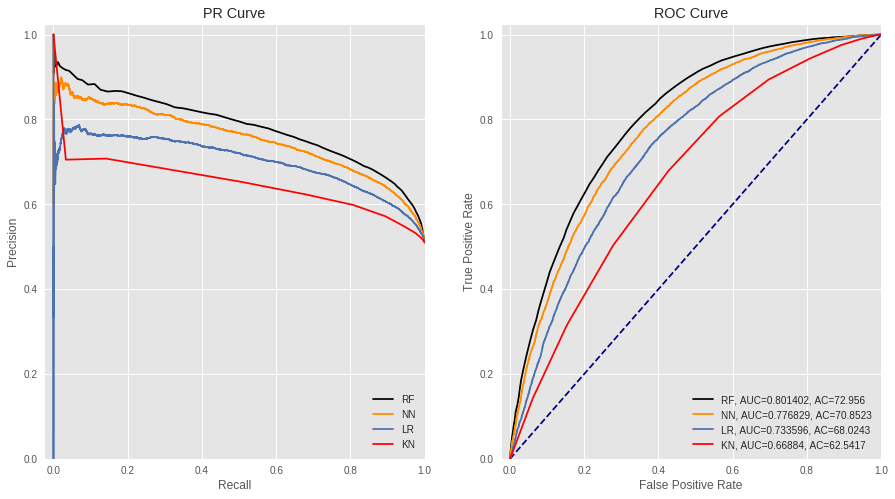

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,auc,precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.025,1])
ax1.set_ylim([0,1.025])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax2.set_xlim([-0.025,1])
ax2.set_ylim([0,1.025])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

#y_pred_proba=best_grid.predict(X_test)
y_pred_proba=predicted[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="RF, AUC="+str(auc)+", AC="+str(acrff),color='black')
ax1.plot(r,p,label='RF',color='black')
#plt.legend(loc=4)

#y_pred_proba = model.predict_proba(X_test)
y_pred_proba=nn[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="NN, AUC="+str(auc)+", AC="+str(nnnn),color='darkorange')
ax1.plot(r,p,label='NN',color='darkorange')
#ax2.legend(loc=4)

for w,k in zip([1],'bgrcmykw'):
    #lr_model = LogisticRegression(class_weight={0:1,1:w})
    #lr_model.fit(X_train,y_train)
    #pred_prob = lr_model.predict_proba(X_test)[:,1]
    #pred_prob = logreg.predict_proba(X_test)[::,1]
    pred_prob=pp[::,1]
    p,r,_ = precision_recall_curve(y,pred_prob)
    tpr,fpr,_ = roc_curve(y,pred_prob)
    auc = np.round(metrics.roc_auc_score(y, pred_prob),6)
    ax1.plot(r,p,c=k,label='LR')
    ax2.plot(tpr,fpr,c=k,label='LR, AUC='+str(auc)+", AC="+str(mmmm))

#y_pred_proba=svclassifier.predict_proba(X_test)[:,1]
y_pred_proba=kkk[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="KN, AUC="+str(auc)+", AC="+str(kkkk),color='red')
ax1.plot(r,p,label='KN',color='red')
#plt.legend(loc=4)

ax1.legend(loc='lower right')    
ax2.legend(loc='lower right')
#plt.savefig('11roc.eps', format='eps', dpi=1200)
plt.show()